In [88]:
import kmapper as km
from sklearn import datasets

import networkx as nx
import matplotlib.pylab as plt

In [89]:
data, labels = datasets.make_circles(n_samples=200, noise=0.03, factor=0.3)
data_1_x = []
data_1_y = []
data_2_x = []
data_2_y = []

for i in range(len(data)):
    if labels[i]==1:
        data_1_x.append(data[i][0])
        data_1_y.append(data[i][1])
    else:
        data_2_x.append(data[i][0])
        data_2_y.append(data[i][1])

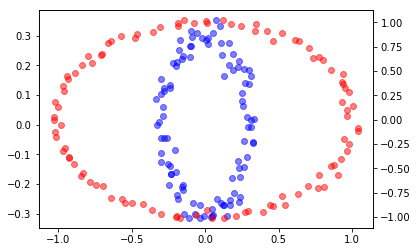

In [73]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

ax1.plot(data_1_x, data_1_y, 'bo', alpha=0.5)
ax2.plot(data_2_x, data_2_y, 'ro', alpha=0.5)

In [81]:
# Initialize
mapper = km.KeplerMapper(verbose=0)

# Fit to and transform the data
projected_data = mapper.fit_transform(data, projection=[0,1]) # X-Y axis

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, data, nr_cubes=3, overlap_perc=0.3)

In [82]:
edge_list = []
for k, v in graph['links'].items():
    for v_tmp in v:
        edge_list.append((k,v_tmp))
    
G = nx.Graph()
G.add_nodes_from(graph['nodes'])
G.add_edges_from(edge_list)

In [84]:
graph['meta_nodes']

defaultdict(list,
            {'cube0_cluster0': {'size': 33, 'coordinates': array([0, 0])},
             'cube0_cluster1': {'size': 33, 'coordinates': array([0, 0])},
             'cube1_cluster0': {'size': 50, 'coordinates': array([0, 1])},
             'cube1_cluster1': {'size': 50, 'coordinates': array([0, 1])},
             'cube2_cluster0': {'size': 19, 'coordinates': array([0, 2])},
             'cube3_cluster0': {'size': 52, 'coordinates': array([1, 0])},
             'cube3_cluster1': {'size': 52, 'coordinates': array([1, 0])},
             'cube4_cluster0': {'size': 100, 'coordinates': array([1, 1])},
             'cube5_cluster0': {'size': 16, 'coordinates': array([1, 2])},
             'cube6_cluster0': {'size': 17, 'coordinates': array([2, 0])},
             'cube7_cluster0': {'size': 15, 'coordinates': array([2, 1])},
             'cube8_cluster0': {'size': 13, 'coordinates': array([2, 2])}})

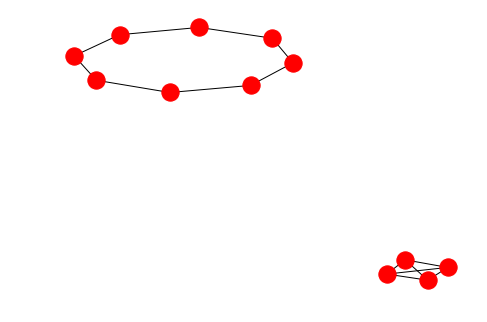

In [83]:
nx.draw(G)
plt.show()